<a href="https://colab.research.google.com/github/jchuwonganant/CIS/blob/main/CIS731%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade git+https://github.com/xuhongzuo/DeepOD.git

  Cloning https://github.com/xuhongzuo/DeepOD.git to /tmp/pip-req-build-5af86i3p
  Running command git clone --filter=blob:none --quiet https://github.com/xuhongzuo/DeepOD.git /tmp/pip-req-build-5af86i3p
  Resolved https://github.com/xuhongzuo/DeepOD.git to commit bb8c20c5c7e860a7c5f6dde4b4a9981bd0eb739d
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 57.6 MB/s eta 0:00:00
  Created wheel for deepod: filename=deepod-0.4.1-py3-none-any.whl size=178490 sha256=1111e046

In [9]:
pip install deepod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.13.0 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 1.13.0 which is 

## CIS 731 Project Requirements
- At least two different models
  - Compared through AUC Scores & Pair-wise T-Test
- 6-8 Page Report
- Focus credit card fraud detection/information

### Above and Beyond
- Each of us pick an 'advanced' model and compare them to a baseline or between each other

### Tasks for 11/23 Weekend
- Find a secondary model to compare against (Could be Kmeans or something else simple)
- Start the project/project outline talking about the models
- Start getting AUC & Pair-wise T-Test set up



## Load in data

In [2]:
!git clone https://github.com/xuhongzuo/DeepOD.git
import os
os.chdir("DeepOD")

Cloning into 'DeepOD'...
remote: Enumerating objects: 1985, done.
remote: Counting objects: 100% (689/689), done.
remote: Compressing objects: 100% (286/286), done.
remote: Total 1985 (delta 458), reused 567 (delta 398), pack-reused 1296 (from 1)
Receiving objects: 100% (1985/1985), 3.60 MiB | 4.76 MiB/s, done.
Resolving deltas: 100% (1262/1262), done.


In [3]:
!git clone https://github.com/Minqi824/ADBench.git
os.chdir("ADBench")

Cloning into 'ADBench'...
remote: Enumerating objects: 1074, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1074 (delta 140), reused 167 (delta 133), pack-reused 885 (from 1)
Receiving objects: 100% (1074/1074), 2.05 GiB | 14.66 MiB/s, done.
Resolving deltas: 100% (447/447), done.
Updating files: 100% (328/328), done.


In [4]:
!wget https://github.com/Minqi824/ADBench/raw/main/adbench/datasets/Classical/13_fraud.npz
from numpy import load
data = load("13_fraud.npz")
print(data.files)  # Lists the keys inside the file

X_train = data['X']  # Access the X array
y_train = data['y']  # Access the y array

print(X_train.shape)
print(y_train.shape)

--2024-12-11 01:13:34--  https://github.com/Minqi824/ADBench/raw/main/adbench/datasets/Classical/13_fraud.npz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Minqi824/ADBench/main/adbench/datasets/Classical/13_fraud.npz [following]
--2024-12-11 01:13:35--  https://raw.githubusercontent.com/Minqi824/ADBench/main/adbench/datasets/Classical/13_fraud.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45902776 (44M) [application/octet-stream]
Saving to: ‘13_fraud.npz’

13_fraud.npz        100%[===================>]  43.78M  --.-KB/s    in 0.1s    

2024-12-11 01:13:38 (407 MB/s) - ‘13_fraud.npz’

In [5]:
from numpy import load
data = load("13_fraud.npz")
#print(data.files)
X_train = data['X']
y_train = data['y']
#X_test = data['X_test']
#y_test = data['y_test']
#lst = data.files
#for item in lst:
#   print(item)
#    print(data[item])

In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'X_train' and 'y_train' are the original data and labels
X_train2, X_test, y_train2, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Full Data Training

In [14]:
# unsupervised methods - Full Data Training
  ## AUC Score: 0.829175765343289
from deepod.models.tabular import DeepSVDD
clf = DeepSVDD(epochs = 1)
clf.fit(X_train, y=None)
scores = clf.decision_function(X_train)

# weakly-supervised methods
#from deepod.models.tabular import DevNet
#clf = DevNet()
#clf.fit(X_train, y=semi_y) # semi_y uses 1 for known anomalies, and 0 for unlabeled data
#scores = clf.decision_function(X_test)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=29, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 0.001096, time: 8.1s
Start Inference on the training data...


testing: 100%|██████████| 4451/4451 [00:02<00:00, 1629.04it/s]


In [15]:
# evaluation of tabular anomaly detection
from deepod.metrics import tabular_metrics
auc, ap, f1 = tabular_metrics(y_train, scores)
print(auc)

0.9157372898404079


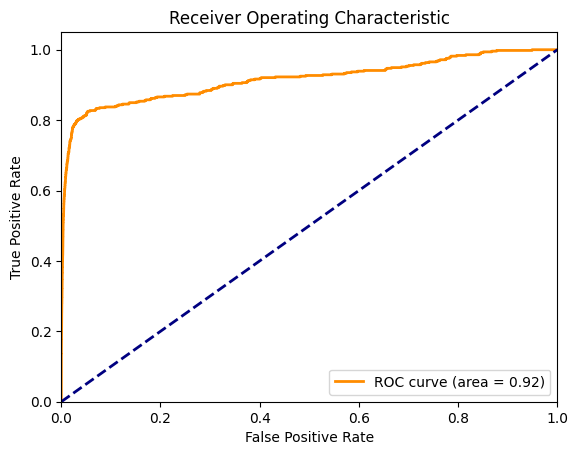

In [16]:
### ROC Plot
from deepod.metrics import tabular_metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Train with Test-Train split

In [19]:
clf2 = DeepSVDD(epochs = 1)
clf2.fit(X_train2, y=None)
scores_train_split = clf2.decision_function(X_train2)
scores_test_split = clf2.decision_function(X_test)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=29, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 0.001356, time: 7.6s
Start Inference on the training data...


testing: 100%|██████████| 891/891 [00:00<00:00, 1698.97it/s]


In [20]:
### Partial Training Metrics
from deepod.metrics import tabular_metrics
auc2, ap2, f12 = tabular_metrics(y_train2, scores_train_split)
    # AUC: 0.9091443960697331
auc21, ap21, f121 = tabular_metrics(y_test, scores_test_split)
    # Test AUC: 0.9053854237249206
print(auc21)

0.9410553859979558


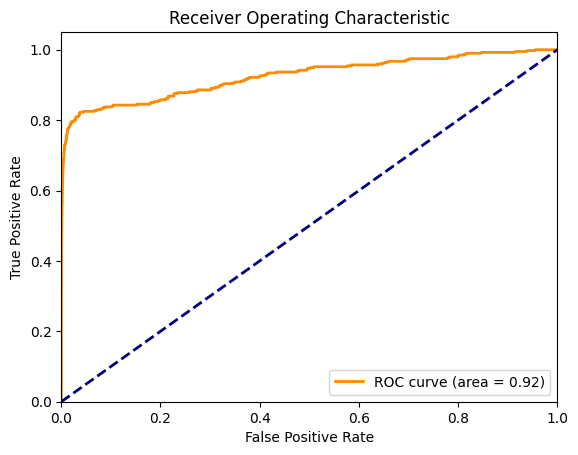

In [21]:
fpr, tpr, thresholds = roc_curve(y_train2, scores_train_split)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

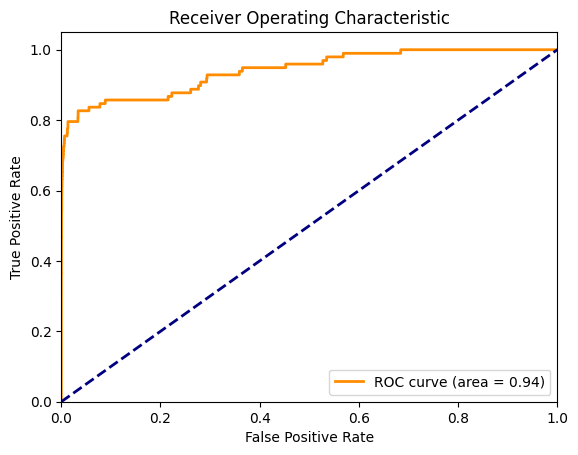

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, scores_test_split)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from deepod.metrics import tabular_metrics

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test)

# Fit KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters for anomaly detection
kmeans.fit(X_train_scaled)

# Calculate anomaly scores (distance to the nearest cluster center)
kmeans_distances_train = kmeans.transform(X_train_scaled)  # Distances to cluster centers for training data
kmeans_distances_test = kmeans.transform(X_test_scaled)  # Distances to cluster centers for test data

# Anomaly scores: minimum distance to the nearest cluster center
scores_train_kmeans = kmeans_distances_train.min(axis=1)
scores_test_kmeans = kmeans_distances_test.min(axis=1)

# Evaluate using AUC, AP, and F1 scores
auc_train_kmeans, ap_train_kmeans, f1_train_kmeans = tabular_metrics(y_train2, scores_train_kmeans)
auc_test_kmeans, ap_test_kmeans, f1_test_kmeans = tabular_metrics(y_test, scores_test_kmeans)

# Print results
print(f"KMeans Training Metrics - AUC: {auc_train_kmeans}, AP: {ap_train_kmeans}, F1: {f1_train_kmeans}")
print(f"KMeans Test Metrics - AUC: {auc_test_kmeans}, AP: {ap_test_kmeans}, F1: {f1_test_kmeans}")

KMeans Training Metrics - AUC: 0.9521533694756636, AP: 0.1466135615782124, F1: 0.22588832487309646
KMeans Test Metrics - AUC: 0.9631415593812088, AP: 0.17158117139102222, F1: 0.25510204081632654


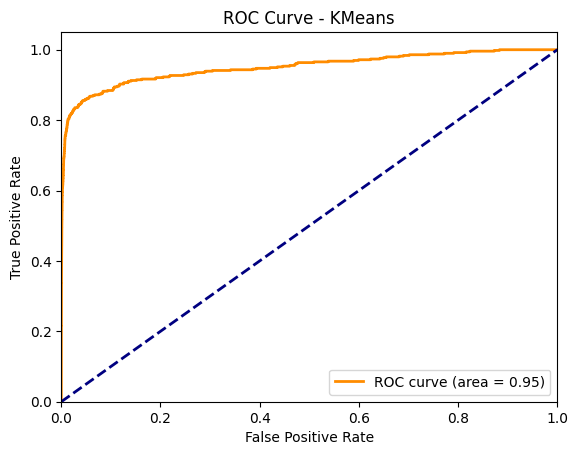

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'X_train' is your feature set, and 'y_train' are the true labels
kmeans = KMeans(n_clusters=2, random_state=42)  # n_clusters=2 for binary classification
kmeans.fit(X_train)

# Calculate the distance of each point to the nearest cluster center
distances = kmeans.transform(X_train)  # Distance to each cluster center
scores = distances.min(axis=1)  # Use the minimum distance as the "score"

# Now, calculate fpr and tpr for ROC
fpr, tpr, thresholds = roc_curve(y_train, scores)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])  # X-axis range
plt.ylim([0.0, 1.05])  # Y-axis range
plt.xlabel('False Positive Rate')  # Label for X-axis
plt.ylabel('True Positive Rate')  # Label for Y-axis
plt.title('ROC Curve - KMeans')  # Title of the plot
plt.legend(loc="lower right")  # Display the legend
plt.show()  # Show the plot


In [25]:
# DeepSVDD scores
scores_deepsvdd = clf2.decision_function(X_test)

# KMeans scores
kmeans_distances = kmeans.transform(X_test)
scores_kmeans = kmeans_distances.min(axis=1)

### Pair-wise T-Test
from scipy import stats

# Assuming 'scores_deepsvdd' and 'scores_other_model' are anomaly scores from both models
t_statistic, p_value = stats.ttest_rel(scores_deepsvdd, scores_kmeans)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

testing: 100%|██████████| 891/891 [00:00<00:00, 1657.06it/s]


T-statistic: -704.7909202614371
P-value: 0.0


In [ ]:
#!pip install torch==1.9.0 torchvision==0.10.0

In [26]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#from XBNet.training_utils import training,predict
#from XBNet.models import XBNETClassifier
#from XBNet.run import run_XBNET